In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


In [2]:
data = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")

In [3]:
data.shape

(60000, 785)

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = data.iloc[:,1:].values

In [8]:
X.shape

(60000, 784)

In [9]:
y = data["label"].values

In [10]:
y.shape

(60000,)

In [17]:
import matplotlib.pyplot as plt

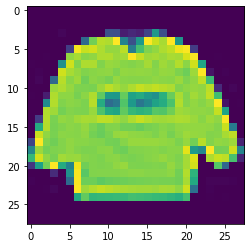

In [19]:
plt.imshow(X[0].reshape(28,28));

In [21]:
y[0]

2

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_vt,y_train,y_vt = train_test_split(X,y,test_size = 0.2)

In [45]:
X_train.shape

(48000, 784)

In [24]:
X_test,X_cv,y_test,y_cv = train_test_split(X_vt,y_vt,test_size = 0.5)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
y_pred = knn.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

0.8506666666666667

In [32]:
#always do feature scaling before applying pca

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
std = StandardScaler()

In [35]:
X_train = std.fit_transform(X_train)

In [36]:
X_test = std.fit_transform(X_test)

***Applying PCA***

In [37]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components = None)

*none is added so that all 784 features can be converted into pca,less can also be taken*

In [43]:
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.fit_transform(X_test)

***instead of pca.fit_transform pca.transform can also be passed in only the test set case.it is  important to run ***

In [44]:
X_train_new.shape

(48000, 784)

In [46]:
pca.explained_variance_ratio_

array([2.16094013e-01, 1.46619908e-01, 5.49577095e-02, 5.12789181e-02,
       4.09966963e-02, 3.11440605e-02, 2.77688836e-02, 2.38139977e-02,
       1.75675491e-02, 1.31364140e-02, 1.20837659e-02, 9.84316507e-03,
       9.33557052e-03, 8.70820988e-03, 7.59449129e-03, 6.91449402e-03,
       6.91173010e-03, 6.49355307e-03, 6.26406331e-03, 5.86003886e-03,
       5.64933150e-03, 5.16661880e-03, 4.78928501e-03, 4.48646449e-03,
       4.47226277e-03, 4.36887376e-03, 4.19087530e-03, 4.01249889e-03,
       3.95647838e-03, 3.78278383e-03, 3.65529015e-03, 3.53830508e-03,
       3.46440326e-03, 3.29050431e-03, 3.19248765e-03, 3.14793498e-03,
       3.06676667e-03, 2.97948298e-03, 2.85148037e-03, 2.78425444e-03,
       2.74109062e-03, 2.65361049e-03, 2.56730143e-03, 2.52580698e-03,
       2.46977301e-03, 2.41649573e-03, 2.36766556e-03, 2.31140910e-03,
       2.28316342e-03, 2.21795601e-03, 2.14273819e-03, 2.11764533e-03,
       2.07151254e-03, 2.01549700e-03, 1.96469303e-03, 1.94105245e-03,
      

*this return the variance each columns can generate.the columns which give the highest variance are selected*

In [47]:
pca1 = PCA(n_components = 50)

**n_components automatically select best features**

In [49]:
X_train_new1 = pca1.fit_transform(X_train)

In [50]:
X_test_new1 = pca1.fit_transform(X_test)

In [51]:
X_train_new1.shape

(48000, 50)

In [56]:
knn1 = KNeighborsClassifier(n_neighbors = 5)

In [57]:
knn.fit(X_train_new1,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
y_pred1 = knn.predict(X_test_new1)

In [62]:
accuracy_score(y_test,y_pred1)

0.47783333333333333

####for getting optimal value of n_components run loop as

In [65]:
accuracy = []
for i in range(1,785):
    pca2 = PCA(n_components = i)
    X_tr = pca2.fit_transform(X_train)
    X_te = pca2.fit_transform(X_test)
    clf2 = KNeighborsClassifier()
    clf2.fit(X_tr,y_train)
    y_pred2 = clf2.predict(X_te)
    print(accuracy_score(y_test,y_pred2))
    accuracy.append(accuracy_score(y_test,y_pred2))

AttributeError: 'KNeighborsClassifier' object has no attribute 'train'